## Open Root Finding Methods - Chapter 13, McClarren

We just finished looking at closed root finding methods, which involve specifying an interval in which we know that the root resides, and subsequent shrinking of the interval to refine the guess. 

In open methods, we just need an initial guess and we iterate from there.

### Newton's Method

Newton’s method is a rapidly convergent method that is a good choice provided that one
has an estimate of the root. 

Newton’s method is also known as the Newton–Raphson method because Isaac Newton is famous enough, and Raphson published the method before Newton did. However, the historical record indicates that Newton had used this method well before Raphson published it. Interestingly enough, Raphson also coined the term pantheism. 

Newton’s method is fairly robust. What the method does is compute the tangent at the
guess $x_i$ (via the derivative $f'(x_i)$ ) and uses where the tangent crosses zero to get the next
guess. In the following figures, this procedure is illustrated. First, we show the procedure for
going from the initial guess to the first calculated update:

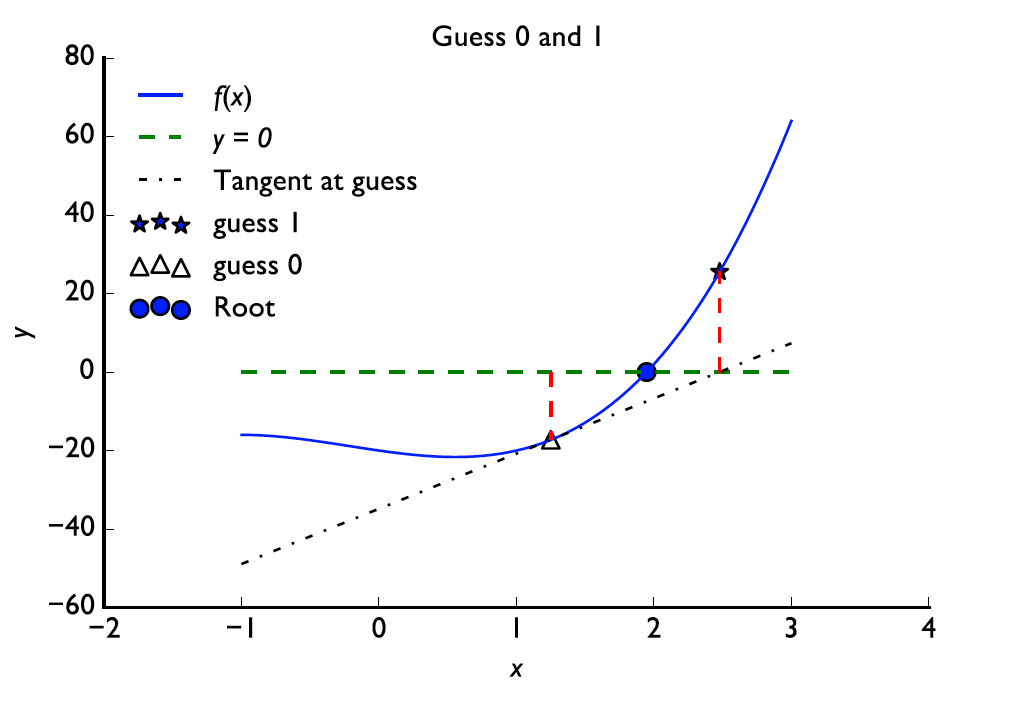

Next, we compute the slope of the function at this point and find where it crosses the axis:

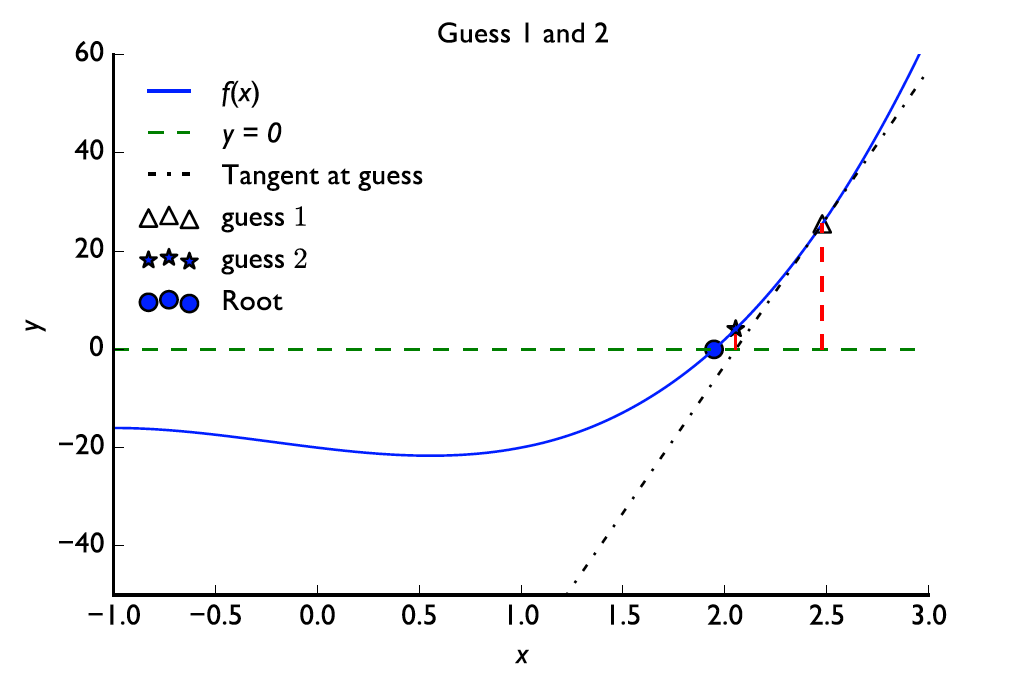

As you can see, we get closer to the root each iteration. This is due to the fact that over
a short range, the tangent line is a reasonable approximation to the original function—just
as the linear Taylor series can be a good approximation for small perturbations around the
center of the expansion. Of course, using the slope to approximate the function behavior near
a root is not always a good approximation, as we will see later.

The basic idea is to compute where the tangent line to the current root estimate crosses
the $x$ axis. We do this by equating the derivative of the function at the current estimate, $x_i$, to
the slope of a line between the point $f(x_i)$ and the estimate of the function evaluated at an
unknown point $f(x_{i+1})$:

$$ f'(x_i) = \frac{f(x_{i+1})-f(x_i)}{x_{i+1} - x_i}.$$

Then, we set $f(x_{i+1}) = 0$ to determine where the tangent crosses zero. This yields 

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}. $$

Therefore, each iteration requires the evaluation of the slope at $x_i$ and the value of the function
at that same point. An implementation of Newton’s method in Python is given below.


In [42]:
def newton(f,fprime,x0,epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of
        fprime: derivative of f
        x0: initial guess
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    import numpy as np
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    while (np.fabs(f(x)) > epsilon):
        
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",f(x),"/",fprime(x),"=",x - f(x)/fprime(x))
        x = x - f(x)/fprime(x)
        iterations += 1
    print("It took",iterations,"iterations")
    return x #return estimate of root

We will test the method on the cubic nonlinear function from the previous chapter. We
will need to define a derivative function to use because Newton’s method requires it. As a
reference, bisection took 23 iterations and Ridder’s method (we didn't look at this one...) took 8. It is slightly difficult to compare an open method to the closed methods because we cannot run the method under
the same conditions and the open method only requires a single initial guess, not an interval
that brackets the root. Furthermore, in Newton’s method we have to evaluate the function
and its derivative in each iteration. It is useful, however, to compare the overall convergence
behavior between methods.

In [43]:
def nonlinear_function(x):
    #compute a nonlinear function for demonstration
    return 3*x**3 + 2*x**2 - 5*x-20

def Dnonlinear_function(x):
    #compute a nonlinear function for demonstration
    return 9*x**2 + 4*x - 5
root = newton(nonlinear_function,Dnonlinear_function,-1.5,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",
      nonlinear_function(root))

x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.25 = 0.45945945945945943
x_ 2 = 0.45945945945945943 - -21.584111503760884 / -1.2622352081811545 = -16.64045295295295
x_ 3 = -16.64045295295295 - -13206.446010659996 / 2420.5802585031524 = -11.184552053047796
x_ 4 = -11.184552053047796 - -3911.2567600472344 / 1076.1096334338297 = -7.54992539557002
x_ 5 = -7.54992539557002 - -1159.3159776918205 / 477.81265972577813 = -5.123627234367753
x_ 6 = -5.123627234367753 - -345.3883141179978 / 210.7694953933235 = -3.484925611661592
x_ 7 = -3.484925611661592 - -105.25615528465704 / 90.36265622268793 = -2.320106429882939
x_ 8 = -2.320106429882939 - -35.100340028952424 / 34.165618894325654 = -1.2927478991471761
x_ 9 = -1.2927478991471761 - -16.675175982276617 / 4.869782580156233 = 2.131465750600949
x_ 10 = 2.131465750600949 - 7.479645608829035 / 44.41417921626759 = 1.963059044886359
x_ 11 = 1.963059044886359 - 0.5864442011938849 / 37.53464350293673 = 1.9474349667957278
x_ 12 = 1.9474349667957278 - 0.004789634744607

In this example we had a bad initial guess so the method went the wrong way at first, but
it eventually honed in on the solution. This highlights a feature of open methods: the root
estimate can get worse, and even diverge. This is in comparison with closed methods where
the root is confined to an interval. On the other hand, open methods only require an initial
guess instead of knowledge of an interval where the root lies. In the first iteration, the method
did move closer to the root, but the new estimate was close to a local minimum:

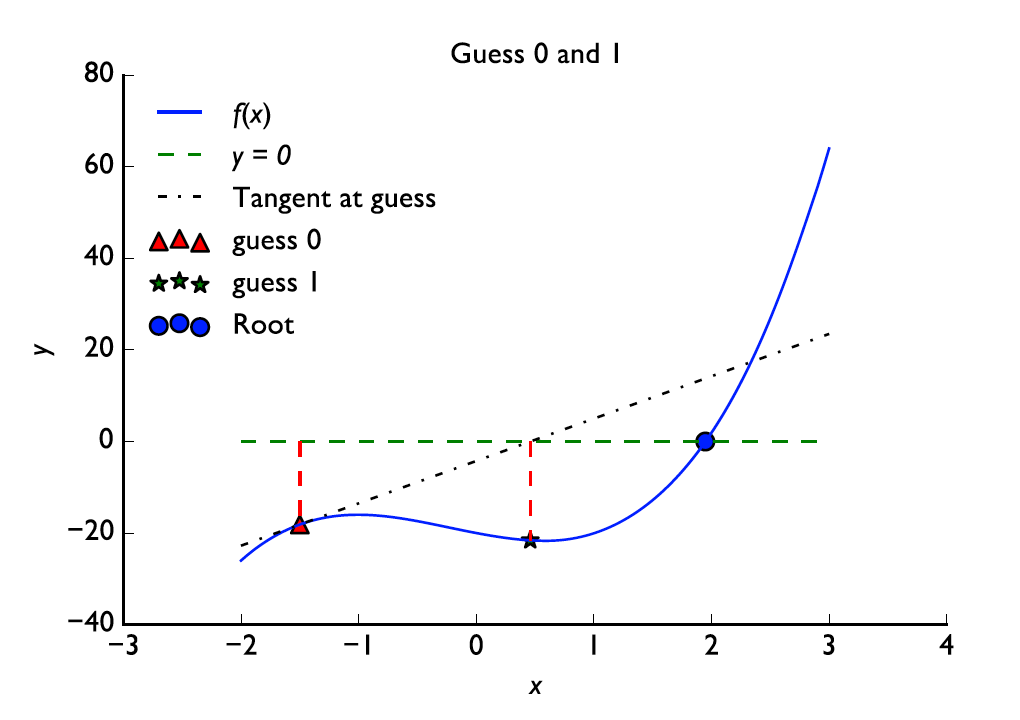

The slope at this point then moves the method long distance in the wrong direction:

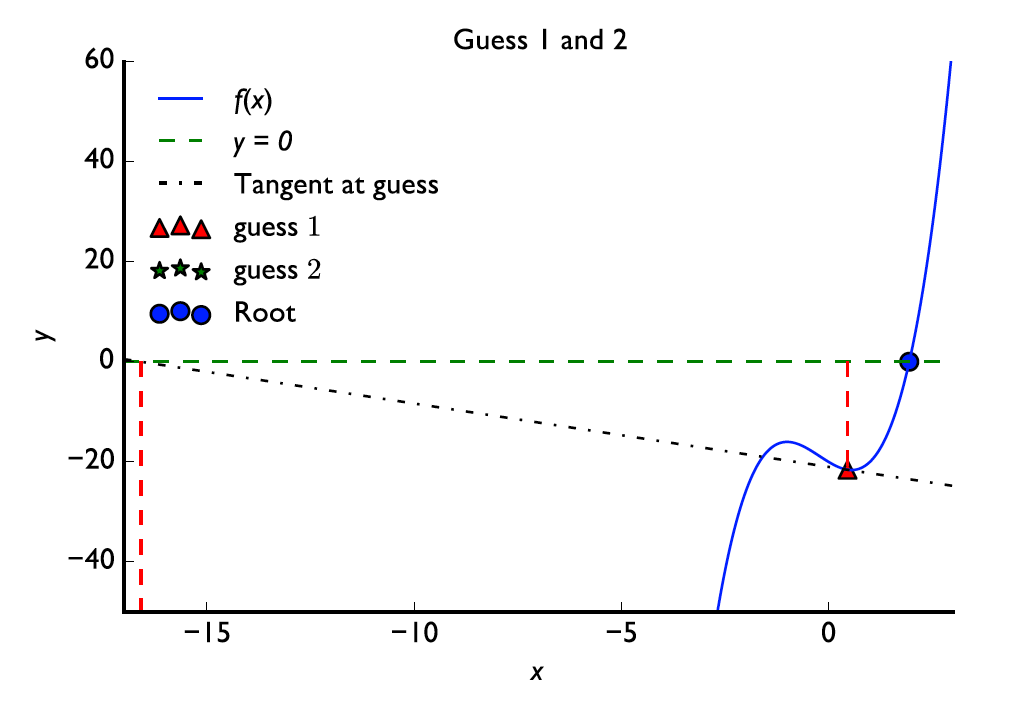

This estimate is much worse than that after the first iteration. Nevertheless, after this point
the method, does move in the correct direction.

The other test we performed on the closed root finding methods was the critical sphere
problem:

$$ f(R) = \left(\frac{\pi}{R+2D}\right)^2 - \frac{\nu \Sigma_f - \Sigma_a}{D}. $$

For Newton’s method, we need to compute the derivative:

$$ f'(R) = \frac{- 2 \pi}{R+2D}\right)^3. $$

Recall that regula falsi (false position) had a very hard time with this problem because the
function is flat for a large range of the radius and sharply changing past a transition point.
Newton’s method does not suffer from these problems.

In [44]:
def Crit_Radius(R, D=9.21, nuSigf = 0.1570, Siga = 0.1532):
    import numpy as np
    return (np.pi/(R + 2*D))**2 - (nuSigf - Siga)/D
def DCrit_Radius(R, D=9.21, nuSigf = 0.1570, Siga = 0.1532):
    import numpy as np
    return (-2.0*np.pi**2/(R + 2*D)**3)

For this problem bisection took 28 iterations, false position took 260, and Ridder’s method
took 3 iterations. Here, we will run Newton’s method with an initial guess of 120 (about the
midpoint of the initial range used in the previous chapter).

In [45]:
Radius = newton(Crit_Radius,DCrit_Radius,120,LOUD=True)
print("The critical radius estimate is",Radius,
      "\nf(",Radius,") =",Crit_Radius(Radius))

x0 = 120
x_ 1 = 120 - 0.00010251745512686794 / -7.442746142981495e-06 = 133.77414373101277
x_ 2 = 133.77414373101277 - 1.3497467451998235e-05 / -5.599328100744185e-06 = 136.1846949987987
It took 2 iterations
The critical radius estimate is 136.1846949987987 
f( 136.1846949987987 ) = 3.140322315689872e-07


This is even faster than Ridder’s method, though the comparison is not exactly fair. We
did, however, need to know the derivative of the function and evaluate this at each iteration.

### Inexact Newton

What if we do not know the derivative of the function? There may be cases where the
derivative of the function is unknown or not easily calculable. In these cases we can use a
method that is known as inexact Newton. This method estimates the derivative using a finite
difference:

$$ f'(x_i) = \frac{f(x_i+\delta)-f(x_i)}{\delta} $$

Indeed, the limit of this approximation as
\delta is the definition of a derivative. To implement this we need to only make a small change
to the code to estimate the derivative instead of calling a derivative function.  

which will converge to the derivative as $\delta \rightarrow 0$. Indeed, the limit of this approximation as
δ→0 is the definition of a derivative. To implement this we need to only make a small change
to the code to estimate the derivative instead of calling a derivative function. The downside
$$ \left(\frac{\pi}{R+2D}\right)^2 = \frac{\nu \Sigma_f - \Sigma_a}{D}. is that we need an extra function evaluation to estimate the derivative. This extra cost is
partially offset by eliminating the need to evaluate a function that gives the derivative. In
the code below, we modify the Newton’s method implementation above to perform inexact
Newton iterations.

In [46]:
def inexact_newton(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        delta: finite difference parameter
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    import numpy as np
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    while (np.fabs(f(x)) > epsilon):
        fx = f(x)
        fxdelta = f(x+delta)
        slope = (fxdelta - fx)/delta
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        x = x - fx/slope
        iterations += 1
    print("It took",iterations,"iterations")
    return x #return estimate of root

To compute the derivative we need to define the value of δ. In general, a reasonable value
for this parameter is $10^{−7}$, though it should be adjusted if the value of $x$ in the function
evaluation is very large or small.

On the critical radius problem, inexact Newton performs the same as the original Newton
method:

In [47]:
Radius = inexact_newton(Crit_Radius,120,LOUD=True)
print("The critical radius estimate is",Radius,
      "\nf(",Radius,") =",Crit_Radius(Radius))

x0 = 120
x_ 1 = 120 - 0.00010251745512686794 / -7.442742169100347e-06 = 133.77415108540026
x_ 2 = 133.77415108540026 - 1.3497426272372716e-05 / -5.599325256927523e-06 = 136.18469622307978
It took 2 iterations
The critical radius estimate is 136.18469622307978 
f( 136.18469622307978 ) = 3.1402569209483836e-07


Notice that we get the same answer and it took the same number of iterations.

### Secant Method

The secant method is a variation on the theme of Newton’s method. It takes its name from
the fact that it constructs a straight line that intersects the curve at two points: such a line is
called a secant. In this case we use the previous two guesses to construct the slope:

$$ f'(x_i) = \frac{f(x_{i})-f(x_{i-1})}{x_{i} - x_{i-1}}.$$


The benefit of this is that it does not require an additional function evaluation, nor do we
have to evaluate a derivative function. This will be a big savings if it takes a long time to
do a function evaluation. One issue is that we need two points to get started. Therefore, we
can use inexact Newton for the first step and then use secant from then on. In a graphical
demonstration, we first take a step of inexact Newton:

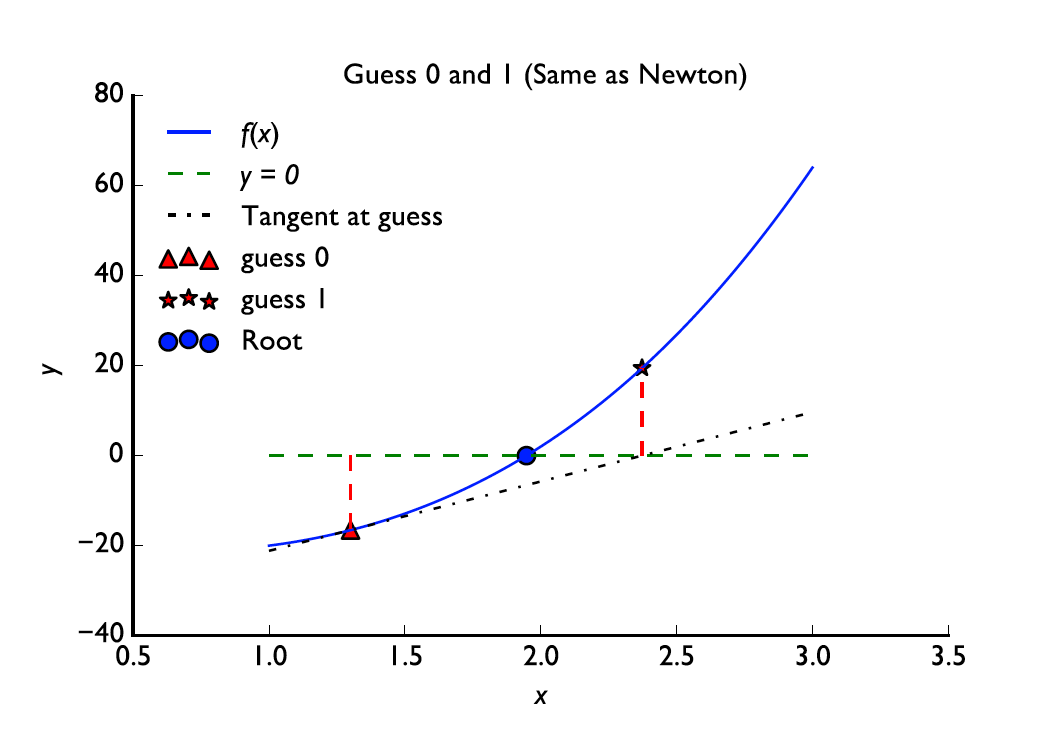

Then we draw the estimate of the derivative using x0 and x1, and find where this crosses
the $x$ axis:

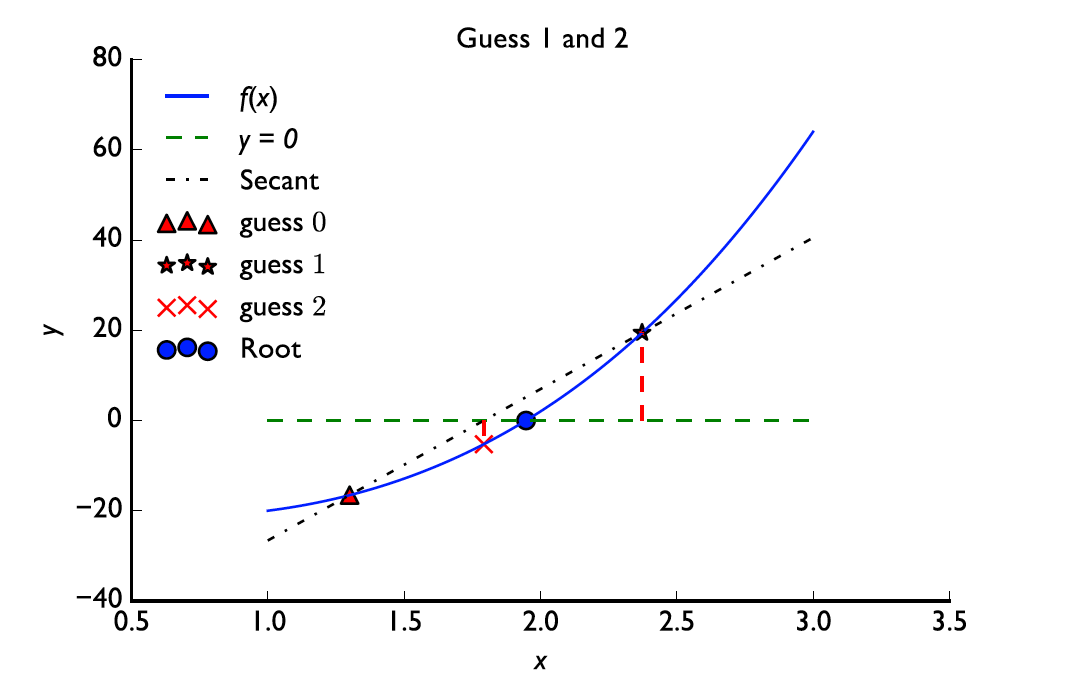

In [48]:
def secant(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        delta: finite difference parameter
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    import numpy as np
    x = x0
    if (LOUD):
        print("x0 =",x0)
    #first time use inexact Newton
    x_old = x
    fold = f(x_old)
    fx = fold
    slope = (f(x_old+delta) - fold)/delta
    x = x - fold/slope
    if (LOUD):
        print("Inexact Newton\nx_",1,"=",x,"-",fx,"/",slope,"=",x - fx/slope,"\nStarting Secant")
    fx = f(x)
    iterations = 1 
    while (np.fabs(fx) > epsilon):
        slope = (fx - fold)/(x - x_old)
        fold = fx
        x_old = x
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        x = x - fx/slope
        fx = f(x)
        iterations += 1
    print("It took",iterations,"iterations")
    return x #return estimate of root

Running the secant method on the critical radius problem, we observe that it takes one
more iteration the Newton’s method:

In [49]:
Radius = secant(Crit_Radius,120,LOUD=True)
print("The critical radius estimate is",Radius,"\nf(",Radius,
      ") =",Crit_Radius(Radius))

x0 = 120
Inexact Newton
x_ 1 = 133.77415108540026 - 0.00010251745512686794 / -7.442742169100347e-06 = 147.54830217080053 
Starting Secant
x_ 2 = 133.77415108540026 - 1.3497426272372716e-05 / -6.462832322846442e-06 = 135.86262028870274
x_ 3 = 135.86262028870274 - 2.0397790242225296e-06 / -5.486146135184707e-06 = 136.23442573718336
It took 3 iterations
The critical radius estimate is 136.23442573718336 
f( 136.23442573718336 ) = 4.8524539480966286e-08


Despite the fact that it took one more iteration, secant only required four function evaluations
to compute the root: one per iteration, plus one extra for the slope estimation in the first
step.

## Slow Convergence

Newton’s method, including its inexact variant, and the secant method can converge
slowly in the presence of the following:
1. Multiple roots or closely spaced roots,
2. Complex roots,
3. Bad initial guess.

The function $f(x) = x^7$ has multiple roots at 0: it converges slowly with Newton’s method.

In [39]:
mult_root = lambda x: 1.0*x**7
Dmult_root = lambda x: 7.0*x**6
root = newton(mult_root,Dmult_root,1.0,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 1.0
x_ 1 = 1.0 - 1.0 / 7.0 = 0.8571428571428572
x_ 2 = 0.8571428571428572 - 0.33991667708911394 / 2.7759861962277634 = 0.7346938775510204
x_ 3 = 0.7346938775510204 - 0.11554334736330486 / 1.1008713373781547 = 0.6297376093294461
x_ 4 = 0.6297376093294461 - 0.03927511069548781 / 0.43657194805493627 = 0.5397750937109538
x_ 5 = 0.5397750937109538 - 0.013350265119917321 / 0.1731311002086809 = 0.4626643660379604
x_ 6 = 0.4626643660379604 - 0.004537977757820996 / 0.0686585063310034 = 0.3965694566039661
x_ 7 = 0.3965694566039661 - 0.0015425343201428206 / 0.027227866546925984 = 0.3399166770891138
x_ 8 = 0.3399166770891138 - 0.0005243331403988625 / 0.01079774024099974 = 0.29135715179066896
x_ 9 = 0.29135715179066896 - 0.00017822957877208114 / 0.004282053979924045 = 0.2497347015348591
x_ 10 = 0.2497347015348591 - 6.058320617519827e-05 / 0.0016981318199673287 = 0.2140583156013078
x_ 11 = 0.2140583156013078 - 2.0593242130478076e-05 / 0.0006734272130863475 = 0.18347855622969242
x_ 12 = 0.183478

If we decrease the number of roots to 1,

$$f(x) = sin(x),$$

we see that a similar problem converges faster.


In [40]:
import numpy as np
mult_root = lambda x: np.sin(x)
Dmult_root = lambda x: np.cos(x)
root = newton(mult_root,Dmult_root,1.0,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 1.0
x_ 1 = 1.0 - 0.8414709848078965 / 0.5403023058681398 = -0.5574077246549021
x_ 2 = -0.5574077246549021 - -0.5289880970896319 / 0.8486292436261492 = 0.06593645192484066
x_ 3 = 0.06593645192484066 - 0.06588868458420974 / 0.9978269796130803 = -9.572191932508134e-05
x_ 4 = -9.572191932508134e-05 - -9.572191917890302e-05 / 0.9999999954186571 = 2.923566201412306e-13
It took 4 iterations
The root estimate is 2.923566201412306e-13 
f( 2.923566201412306e-13 ) = 2.923566201412306e-13


For the case of complex roots we will consider a function that has complex roots near the
actual root. One such function is

$$f(x) = x(x-1)(x-3)+3 $$

The derivative of this function is 

$$ f'(x) = 3 x^3 - 8x +3 $$

The root is at $x = -0.546818.$

In [41]:
x = np.linspace(-1,4,200)
comp_root = lambda x: x*(x-1)*(x-3) + 3
d_comp_root = lambda x: 3*x**2 - 8*x + 3
root = newton(comp_root,d_comp_root,2.0,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 2.0
x_ 1 = 2.0 - 1.0 / -1.0 = 3.0
x_ 2 = 3.0 - 3.0 / 6.0 = 2.5
x_ 3 = 2.5 - 1.125 / 1.75 = 1.8571428571428572
x_ 4 = 1.8571428571428572 - 1.1807580174927113 / -1.5102040816326543 = 2.6389961389961383
x_ 5 = 2.6389961389961383 - 1.4385483817495095 / 2.780932752940469 = 2.1217062547914827
x_ 6 = 2.1217062547914827 - 0.9097213333636254 / -0.4687377434679618 = 4.062495845646789
x_ 7 = 4.062495845646789 - 16.218911005018263 / 20.01165072251795 = 3.2520224254422248
x_ 8 = 3.2520224254422248 - 4.845718347978311 / 8.71077016319959 = 2.69573196464577
x_ 9 = 2.69573196464577 - 1.6091181327603166 / 3.235056758472666 = 2.1983316861047486
x_ 10 = 2.1983316861047486 - 0.8881406969735082 / -0.08866688244154908 = 12.21493171215154
x_ 11 = 12.21493171215154 - 1265.3500398359906 / 352.89421650036365 = 8.629296185493123
x_ 12 = 8.629296185493123 - 373.6072839850617 / 157.35988848695354 = 6.255074345497114
x_ 13 = 6.255074345497114 - 109.99716055272572 / 70.33727043911153 = 4.691221215200477
x_ 14 = 

# This converged slowly because the complex roots at $x = 2.2734 ± 0.5638i$ make the slope of
the function change so that tangents do not necessarily point to a true root.

We can see this graphically by looking at each iteration.
The first iteration moves in the wrong direction:

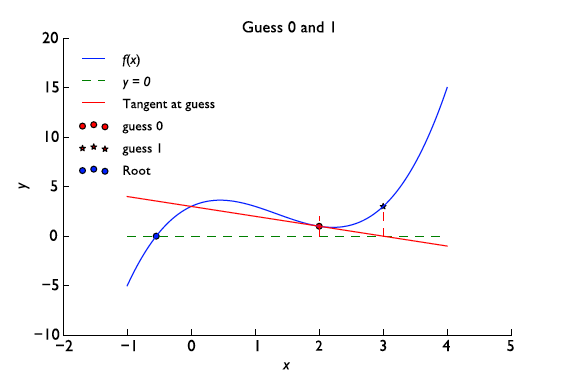

Iterations two and three move in the correct direction:

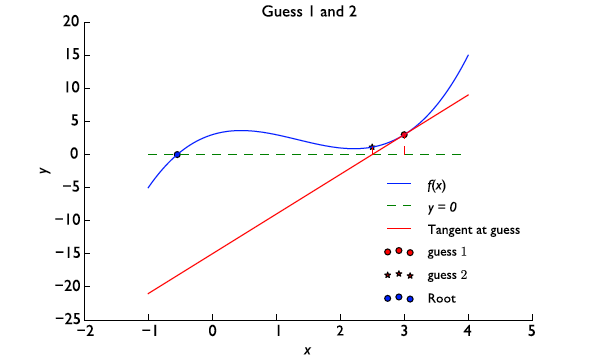

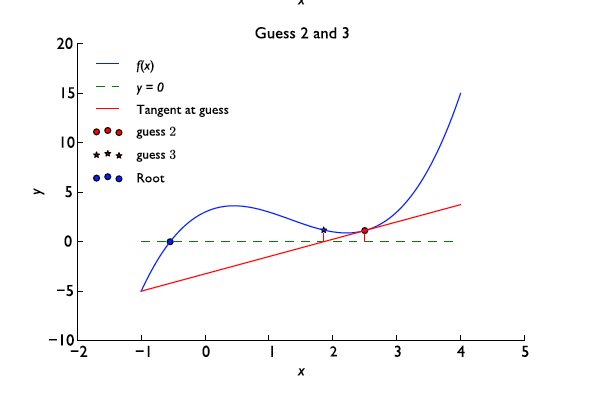

Step four then moves in wrong direction: it has been two steps forward, one step back:

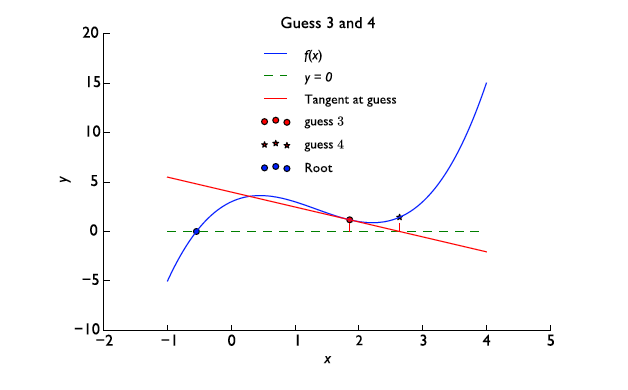

The presence of the complex root causes the solution to oscillate around the local minimum
of the function. Eventually, the method will converge on the root, but it takes many iterations
to do so. The upside, however, is that it does eventually converge.

### Newton's Method for Systems of Equations

Finding the root of a single function is interesting, but in general a simple problem. It is very common that a problem you encounter will require the root of a multidimensional function. This is the situation we analyze now.

Say that we have a function of $n$ variables $\textbf{x} = (x_1, \cdots x_n)$:

$$\textbf{F}(\textbf{x}) =  \begin{pmatrix}
f_1(x_1, \cdots, x_n) \\
\vdots \\
f_n(x_1, \cdots, x_n) 
\end{pmatrix}$$

The root is $\textbf{F}(\textbf{x}) = \textbf{0}$. For this scenario we no longer have a tangent line at point $x$, rather we have a Jacobian matrix that contains the derivative of each component of $\textbf{F}$ with respect to
each component of $\textbf{x}$:

$$ \textbf{J}(\textbf{x}) =  \begin{pmatrix}
\frac{\partial f_1}{\partial x_1}(x_1, \cdots, x_n) & \cdots & \frac{\partial f_n}{\partial x_1}(x_1, \cdots, x_n) \\
\vdots & & \vdots \\
\frac{\partial f_n}{\partial x_1}(x_1, \cdots, x_n) & \cdots &  \frac{\partial f_n}{\partial x_n}(x_1, \cdots, x_n)
\end{pmatrix}$$

We reformulate Newton’s method for a single equation:

$$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $$

as

$$ f'(x_i)(x_{i+1}-x_i) = -f(x_i) $$

The multidimensional analog of this equation is

$$ \textbf{J}(\textbf{x}_i) (\textbf{x}_{i+1}-\textbf{x}_{i}) = -\textbf{F}(\textbf{x}_i). $$

Note this is a linear system of equations to solve to get a vector of changes for each $x$: $\delta = \textbf{x}_{i+1}-\textbf{x}_{i}$. Therefore, in each step we solve the system

$$ \textbf{J}(\textbf{x}_i) \delta = -\textbf{F}(\textbf{x}_i). $$

and set

$$ \textbf{x}_{i+1} = \textbf{x}_{i} + \delta. $$

In multidimensional rootfinding we can observe the importance of having a small number
of iterations: we need to solve a linear system of equations at each iteration. If this system is
large, the time to find the root could be prohibitively long.

### Rectangular Parallelpiped (Shoebox) Reactor Example

As an example of a multidimensional root finding problem, we will consider the problem
of designing a parallelepiped reactor. For this type of reactor the critical equation given by
one-group diffusion theory, i.e., when geometric and materials buckling are equal, is

$$ \left(\frac{\pi}{a+2D}\right)^2 + \left(\frac{\pi}{b+2D}\right)^2 + \left(\frac{\pi}{c+2D}\right)^2 = \frac{\nu \Sigma_f - \Sigma_a}{D} $$

where $a$, $b$, and $c$ are length of the sides. We will solve this with $D = 9.21 cm$, $\nu \Sigma_f$ =
0.1570 cm$^{−1}$, and $\Sigma_a$ = 0.1532 cm$^{−1}$.

To make this a system, we stipulate that the surface area should be 1.2×10$^6$ cm$^2$, and that
$a = b$. This makes

$$\textbf{F}(\textbf{x}) =  \begin{pmatrix}
\left(\frac{\pi}{a+2D}\right)^2 + \left(\frac{\pi}{b+2D}\right)^2 + \left(\frac{\pi}{c+2D}\right)^2 - \frac{\nu \Sigma_f - \Sigma_a}{D} \\
2(ab+bc+ac)-1.2 \times 10^{6} \\
a-b 
\end{pmatrix}$$

with $\textbf{x} = (a,b,c)$.

The Jacobian is

$$\textbf{J}(\textbf{x}) = \begin{pmatrix}
\frac{2\pi}{(a+18.42)^2} &  \frac{2\pi}{(b+18.42)^2} & \frac{2\pi}{(c+18.42)^2} \\
2(b+c) & 2(a+c) & 2(a+b) \\
1 & -1 & 0 
\end{pmatrix}$$

Start with an initial guess of $a = b = 7000$ and $c = 100$, all in cm:

$$\textbf{F}(\textbf{x_0}) =  \begin{pmatrix}
0.000292 \\
9.96 \times 10^7 \\
0
\end{pmatrix}$$

In [7]:
from GaussElim import *
def newton_system(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via inexact Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        delta: finite difference parameter
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    def Jacobian(f,x,delta = 1.0e-7):
        N = x0.size
        J = np.zeros((N,N))
        idelta = 1.0/delta #division is slower than multiplication
        x_perturbed = x.copy() #copy x to add delta
        fx = f(x) #only need to evaluate this once
        for i in range(N):
            x_perturbed[i] += delta
            col = (f(x_perturbed) - fx) * idelta
            x_perturbed[i] = x[i]
            J[:,i] = col
        return J
        
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    fx = f(x)
    while (np.linalg.norm(fx) > epsilon):
        J = Jacobian(f,x,delta)
        
        RHS = -fx;
        delta_x = GaussElimPivotSolve(J,RHS)
        x = x + delta_x
        fx = f(x)
        if (LOUD):
            print("Iteration",iterations+1,": x =",x," norm(f(x)) =",np.linalg.norm(fx))
        iterations += 1
    print("It took",iterations,"iterations")
    return x #return estimate of root

In [8]:
def Reactor(x, D=9.21, nuSigf = 0.1570, Siga = 0.1532):
    """This function is defined in the equation above
    """
    import numpy as np
    answer = np.zeros((3))
    answer[0] = (np.pi/(x[0] + 2*D))**2 + (np.pi/(x[1] + 2*D))**2 + (np.pi/(x[2] + 2*D))**2 - (nuSigf - Siga)/D
    answer[1] = 2*(x[0]*x[1] + x[1]*x[2] + x[0]*x[2])-1.2e6
    answer[2] = x[0] - x[1]
    return answer

In [9]:
import numpy as np
x0 = np.array([7000.0,7000.0,100.0])
x = newton_system(Reactor,x0,LOUD=True, epsilon=1.0e-8, delta = 1.0e-10)
#check
print("The surface area is",2.0*(x[0]*x[1] + x[1]*x[2] + x[0]*x[2]))
D=9.21; nuSigf = 0.1570; Siga = 0.1532;
print("The geometric buckling is",(np.pi/(x[0] + 2*D))**2 + (np.pi/(x[1] + 2*D))**2 + (np.pi/(x[2] + 2*D))**2)
print("The materials buckling is",(nuSigf - Siga)/D)

x0 = [7000. 7000.  100.]
Iteration 1 : x = [3457.80758198 3457.80758198  124.53337225]  norm(f(x)) = 24435316.303158127
Iteration 2 : x = [1747.96947569 1747.96947569  135.46611847]  norm(f(x)) = 5857957.136218936
Iteration 3 : x = [968.6232574  968.6232574  138.49818076]  norm(f(x)) = 1213072.2655313974
Iteration 4 : x = [691.8704215  691.8704215  142.39261251]  norm(f(x)) = 151438.30760954414
Iteration 5 : x = [644.17421405 644.17421405 145.21593206]  norm(f(x)) = 4098.271685356973
Iteration 6 : x = [642.66714275 642.66714275 145.47329562]  norm(f(x)) = 5.741710360394791
Iteration 7 : x = [642.66464112 642.66464112 145.47413   ]  norm(f(x)) = 9.913044050335885e-05
Iteration 8 : x = [642.66464134 642.66464134 145.4741297 ]  norm(f(x)) = 5.634501576423646e-08
Iteration 9 : x = [642.66464134 642.66464134 145.4741297 ]  norm(f(x)) = 1.0842021724855044e-19
It took 9 iterations
The surface area is 1200000.0
The geometric buckling is 0.0004125950054288813
The materials buckling is 0.0004125

The solution is that the a and b are about 642.66 cm and the height of the reactor is
145.47 cm. There are multiple solutions to the problem. We can change the initial condition
so that the method finds a reactor that is taller than this one by guessing a thin and tall parallelepiped.

In [10]:
x0 = np.array([100.0,100.0,10000.0])
x = newton_system(Reactor,x0,LOUD=True, epsilon=1.0e-8, delta = 1.0e-10)
#check
print("The surface area is",2.0*(x[0]*x[1] + x[1]*x[2] + x[0]*x[2]))
D=9.21; nuSigf = 0.1570; Siga = 0.1532;
print("The geometric buckling is",(np.pi/(x[0] + 2*D))**2 + (np.pi/(x[1] + 2*D))**2 + (np.pi/(x[2] + 2*D))**2)
print("The materials buckling is",(nuSigf - Siga)/D)

x0 = [  100.   100. 10000.]
Iteration 1 : x = [  141.87143819   141.87143819 -1265.89519199]  norm(f(x)) = 1878122.4760146132
Iteration 2 : x = [ 183.34199057  183.34199057 2368.062297  ]  norm(f(x)) = 603889.5922697685
Iteration 3 : x = [ 198.97747864  198.97747864 1327.06361557]  norm(f(x)) = 64592.837085931795
Iteration 4 : x = [ 201.58461285  201.58461285 1388.19375125]  norm(f(x)) = 626.7118791844696
Iteration 5 : x = [ 201.64390002  201.64390002 1386.94801519]  norm(f(x)) = 1.0475601060315967
Iteration 6 : x = [ 201.64395039  201.64395039 1386.94891839]  norm(f(x)) = 0.0010251491330564022
Iteration 7 : x = [ 201.6439505   201.6439505  1386.94891624]  norm(f(x)) = 1.802109181880951e-06
Iteration 8 : x = [ 201.6439505   201.6439505  1386.94891624]  norm(f(x)) = 1.862645149230957e-09
It took 8 iterations
The surface area is 1200000.0000000019
The geometric buckling is 0.0004125950054288812
The materials buckling is 0.0004125950054288814


This reactor is almost 14 meters tall and has a geometric cross-section that is about 2 by
2 meters. The fact that there are multiple solutions to the problem is one of the features of
nonlinear root finding to be aware of. One of these solutions may be better for a particular
application, and picking a different initial guess will influence which root the method converges
to. Furthermore, in the presence of multiple roots, an initial guess in the middle of the
two roots may slow the convergence:

In [11]:
x0 = np.array([421.0,421.0,750.0])
x = newton_system(Reactor,x0,LOUD=True, epsilon=1.0e-8, delta = 1.0e-10)
#check
print("The surface area is",2.0*(x[0]*x[1] + x[1]*x[2] + x[0]*x[2]))
D=9.21; nuSigf = 0.1570; Siga = 0.1532;
print("The geometric buckling is",(np.pi/(x[0] + 2*D))**2 + (np.pi/(x[1] + 2*D))**2 + (np.pi/(x[2] + 2*D))**2)
print("The materials buckling is",(nuSigf - Siga)/D)

x0 = [421. 421. 750.]
Iteration 1 : x = [-403.19253367 -403.19253367 2792.77379015]  norm(f(x)) = 5378973.723210256
Iteration 2 : x = [  -3.28159251   -3.28159251 1825.98604414]  norm(f(x)) = 1223947.0308350201
Iteration 3 : x = [ 4.25153284e+00  4.25153284e+00 -8.18552637e+04]  norm(f(x)) = 2592005.215627377
Iteration 4 : x = [1.54658021e+01 1.54658021e+01 2.54415167e+05]  norm(f(x)) = 14539416.818625616
Iteration 5 : x = [ 3.20024142e+01  3.20024142e+01 -3.06964662e+05]  norm(f(x)) = 40492392.75783475
Iteration 6 : x = [5.58744568e+01 5.58744568e+01 1.61480817e+05]  norm(f(x)) = 34896855.68466398
Iteration 7 : x = [    88.7319166      88.7319166  -26865.00154467]  norm(f(x)) = 10719385.600469215
Iteration 8 : x = [  129.4466338    129.4466338  15745.64351894]  norm(f(x)) = 6986395.064079674
Iteration 9 : x = [  169.60353896   169.60353896 -2539.14643276]  norm(f(x)) = 2865062.162843731
Iteration 10 : x = [ 195.24022443  195.24022443 2032.17159998]  norm(f(x)) = 463284.0475391429
Iter